In [ ]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

from aimc_SDSS import mySDSS_aimc, SDSS_aimc

## Import Data

In [2]:
#galaxy_filename = '../../Data/dwarf_voidstatus_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_ALFALFA_HI70.txt'
#galaxy_filename = '../../Data/kias1033_5_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_correctVflag.txt'
galaxy_filename = '/Users/kellydouglass/Documents/Drexel/Research/Data/kias1033_5_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_correctVflag.txt'

galaxies = Table.read(galaxy_filename, format='ascii.commented_header')

## Late or Early Type
Based off classification by Park05

In [15]:
# Early-type
early_boolean1 = np.logical_and.reduce((galaxies['u_r'] > 2.6, 
                                        galaxies['u_r'] < 4, 
                                        galaxies['cd'] > -0.15))
early_boolean2 = np.logical_and.reduce((galaxies['u_r'] > 1, 
                                        galaxies['u_r'] < 4, 
                                        galaxies['cd'] > 0.3))
early_boolean3 = np.logical_and.reduce((galaxies['u_r'] > 1, 
                                        galaxies['u_r'] <= 2.6, 
                                        galaxies['cd'] > -0.28125*galaxies['u_r'] + 0.58125))

early_boolean = np.logical_or.reduce((early_boolean1, early_boolean2, early_boolean3))

# Include those early-type galaxies with inverse concentration index >= 0.43 in the GV
green_boolean = np.logical_and(early_boolean, galaxies['conx1'] >= 0.43)

early_boolean = np.logical_and(early_boolean, galaxies['conx1'] < 0.43)

'''
# Include those RS galaxies with u-r < 2.07 in the GV
green_boolean = np.logical_or(green_boolean, 
                              np.logical_and(early_boolean, galaxies['u_r'] < 2.07))
early_boolean = np.logical_and(early_boolean, galaxies['u_r'] >= 2.07)
'''

## aimc Calculation
Based off values in Choi10, form of formula discerned by Greg Zengilowski

In [4]:
#galaxies['my_aimc'] = mySDSS_aimc(galaxies['u_r'], galaxies['cd'])
galaxies['my_aimc'] = SDSS_aimc(galaxies['u_r'], galaxies['cd'])

## CMD Classification
Based off classification by Choi10

In [11]:
# Red sequence
red_sequence = galaxies[early_boolean]

#RS = galaxies[np.logical_or(galaxies['aimc'] == 1, galaxies['aimc'] == 2)]
RS = galaxies[galaxies['aimc'] == 1]


# Green valley
green_boolean = np.logical_or.reduce((green_boolean, 
                                      galaxies['aimc'] == 2, 
                                      np.logical_and(galaxies['my_aimc'] < 25, 
                                                     np.logical_not(early_boolean))))
green_valley = galaxies[green_boolean]

#GV = galaxies[np.logical_and.reduce((galaxies['aimc'] > 0, 
#                                     galaxies['aimc'] < 25, 
#                                     galaxies['aimc'] != 1, galaxies['aimc'] != 2))]
GV = galaxies[np.logical_and.reduce((galaxies['aimc'] > 0, galaxies['aimc'] < 25, galaxies['aimc'] != 1))]


# Blue cloud
blue_boolean1 = np.logical_and.reduce((galaxies['u_r'] > 1.8, 
                                       galaxies['u_r'] < 4, 
                                       galaxies['cd'] > -0.7, 
                                       galaxies['cd'] < 0.5))
blue_boolean2 = np.logical_and.reduce((galaxies['u_r'] <= 1.8, 
                                       galaxies['cd'] > -0.7, 
                                       galaxies['cd'] < 1))

blue_boolean = np.logical_or(blue_boolean1, blue_boolean2)
blue_boolean = np.logical_and.reduce((blue_boolean, np.logical_not(early_boolean), np.logical_not(green_boolean)))

blue_cloud = galaxies[blue_boolean]

BC = galaxies[galaxies['aimc'] > 25]

## Plotting

<IPython.core.display.Javascript object>


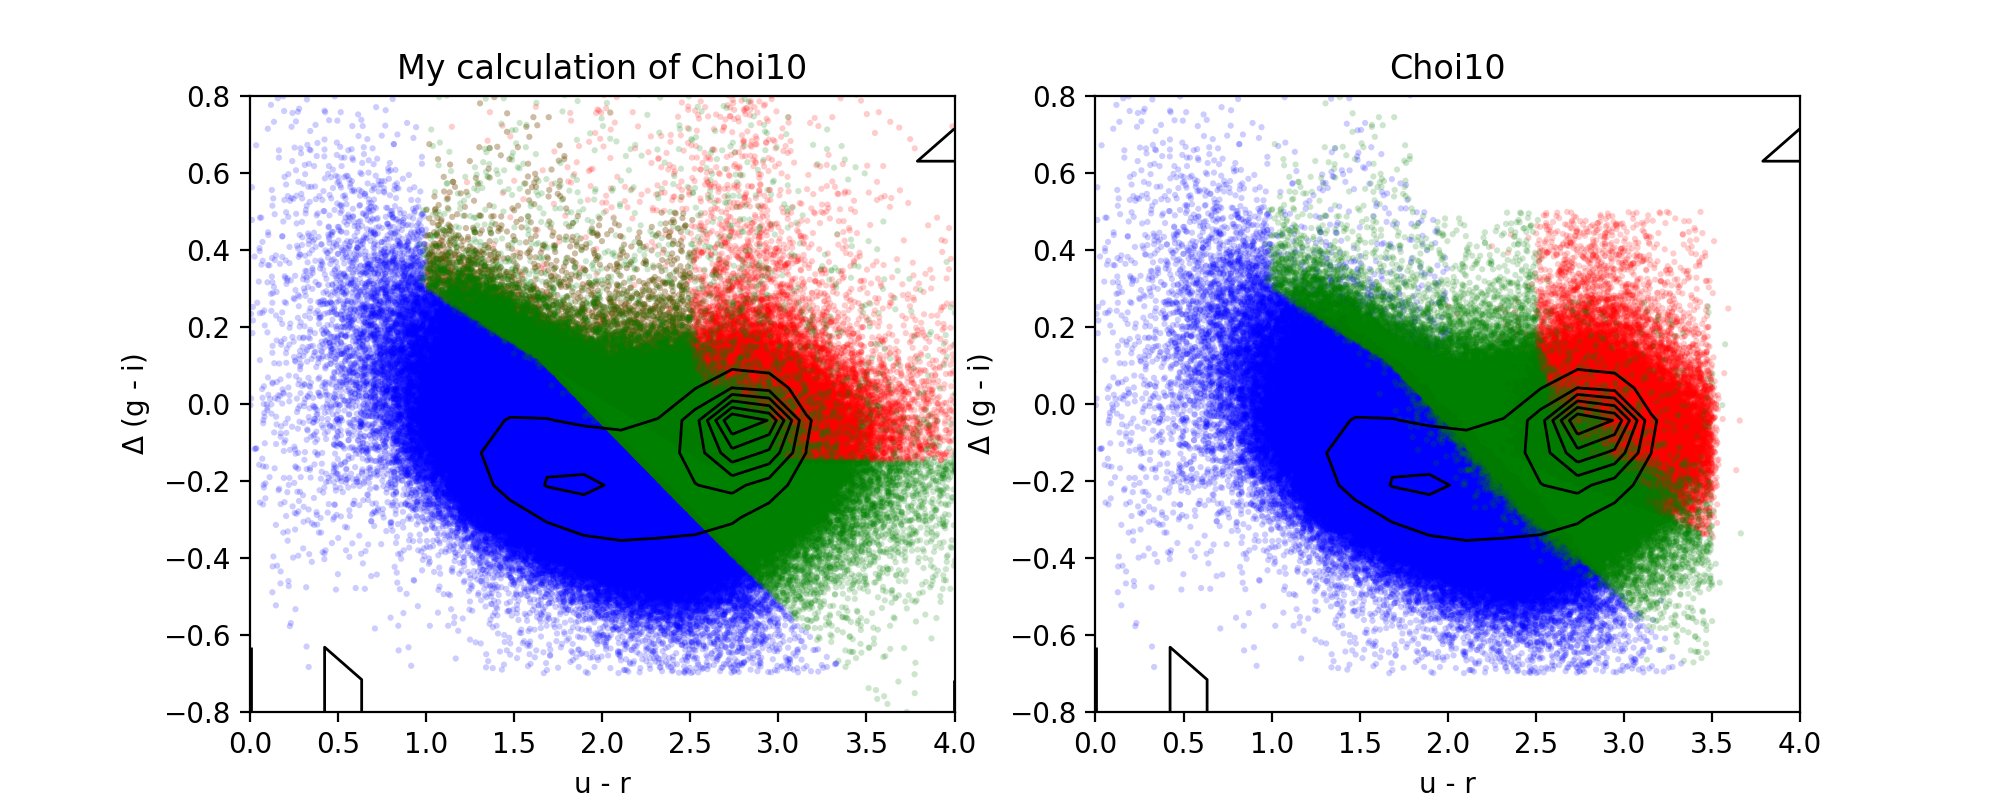

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(121)
galaxies_in_plot = galaxies[np.logical_and.reduce((galaxies['u_r']>=0, 
                                                   galaxies['u_r']<=4, 
                                                   galaxies['cd']>=-0.8, 
                                                   galaxies['cd']<=0.8))]
counts,xbins,ybins = np.histogram2d(galaxies_in_plot['u_r'], galaxies_in_plot['cd'], bins=20)

plt.scatter(red_sequence['u_r'], red_sequence['cd'], s=5, c='r', alpha=0.2, edgecolors='none')
plt.scatter(blue_cloud['u_r'], blue_cloud['cd'], s=5, c='b', alpha=0.2, edgecolors='none')
plt.scatter(green_valley['u_r'], green_valley['cd'], s=5, c='g', alpha=0.2, edgecolors='none')
plt.contour(counts.transpose(), extent=[min(xbins),max(xbins),min(ybins),max(ybins)], 
            linewidths=1, colors='black', linestyles='solid')
plt.xlabel('u - r')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation of Choi10')
plt.axis([0, 4, -0.8, 0.8])


plt.subplot(122)
plt.scatter(RS['u_r'], RS['cd'], s=5, c='r', alpha=0.2, edgecolors='none')
#plt.scatter(galaxies['u_r'][galaxies['aimc'] == 1], galaxies['cd'][galaxies['aimc'] == 1], 
#            s=5, c='r', alpha=0.2, edgecolors='none')
#plt.scatter(galaxies['u_r'][galaxies['aimc'] == 2], galaxies['cd'][galaxies['aimc'] == 2],
#            s=5, c='m', alpha=0.2, edgecolor='none')
plt.scatter(BC['u_r'], BC['cd'], s=5, c='b', alpha=0.2, edgecolors='none')
plt.scatter(GV['u_r'], GV['cd'], s=5, c='g', alpha=0.2, edgecolors='none')
plt.contour(counts.transpose(), extent=[min(xbins),max(xbins),min(ybins),max(ybins)], 
            linewidths=1, colors='black', linestyles='solid')
plt.xlabel('u - r')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi10')
plt.axis([0, 4, -0.8, 0.8]);

# The green galaxies in the red region are those galaxies with color and color gradients 
# of red galaxies, but inverse concentration indices of blue galaxies.

<IPython.core.display.Javascript object>


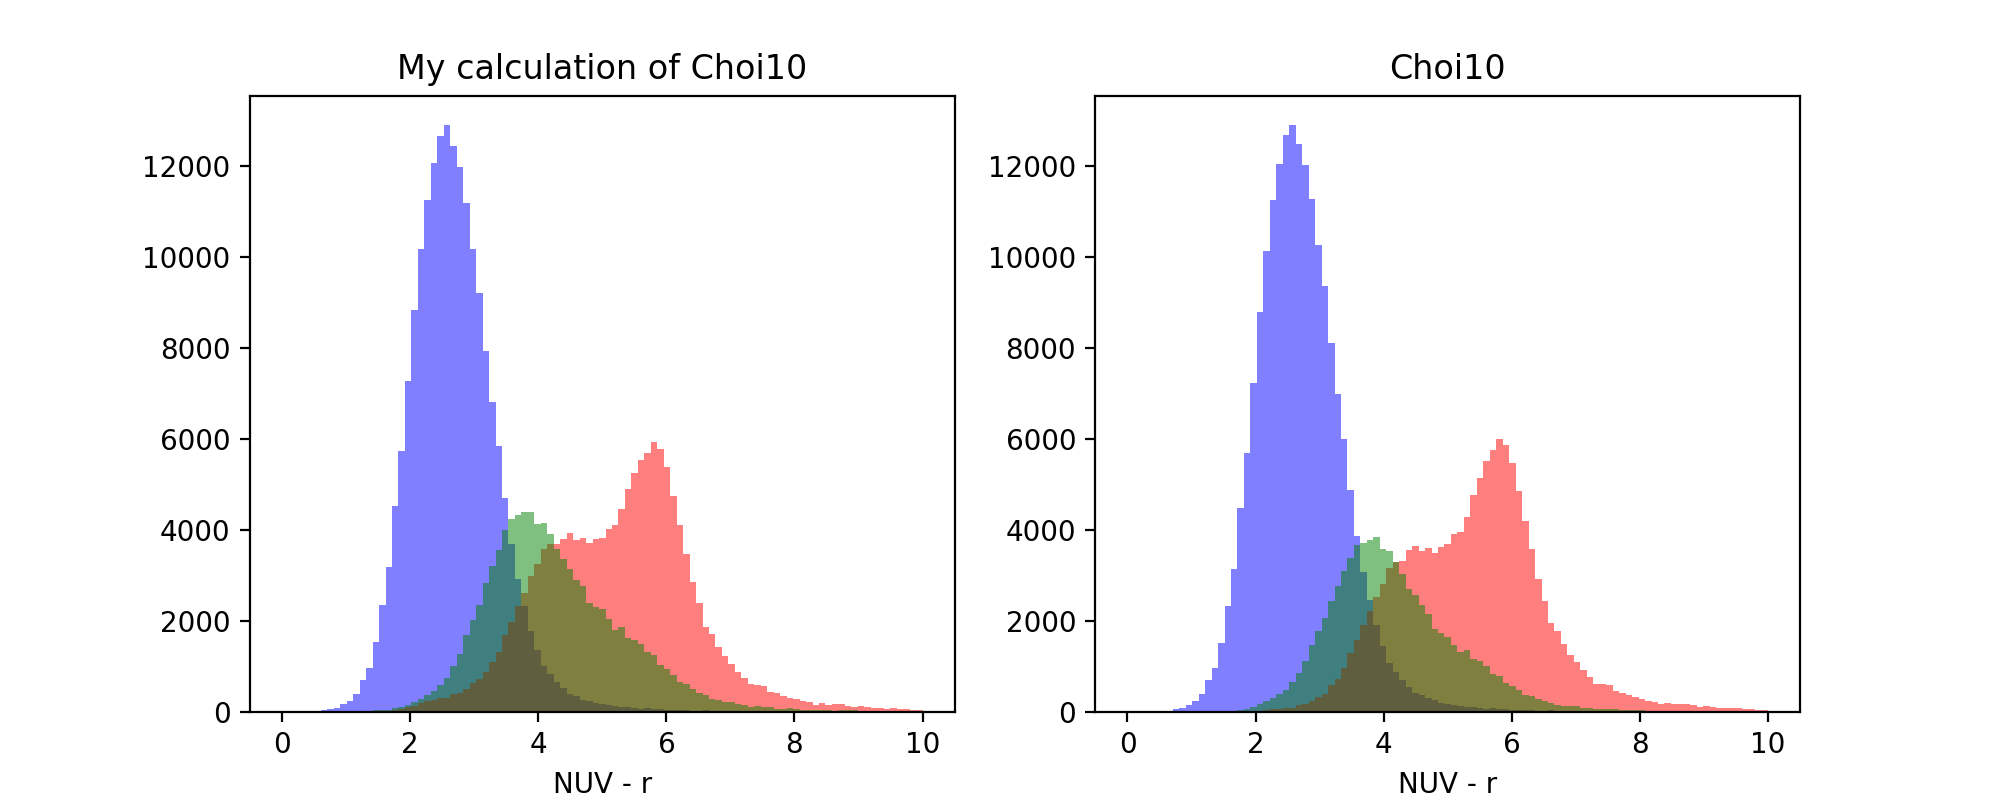

In [13]:
x_range = np.linspace(0, 10, 100)

# Remove NAN values
red_sequence_finite = red_sequence[np.isfinite(red_sequence['NUV_r'])]
blue_cloud_finite = blue_cloud[np.isfinite(blue_cloud['NUV_r'])]
green_valley_finite = green_valley[np.isfinite(green_valley['NUV_r'])]
BC_finite = BC[np.isfinite(BC['NUV_r'])]
RS_finite = RS[np.isfinite(RS['NUV_r'])]
GV_finite = GV[np.isfinite(GV['NUV_r'])]

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(blue_cloud_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='b')
plt.hist(red_sequence_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='r')
plt.hist(green_valley_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='g')
plt.xlabel('NUV - r')
plt.title('My calculation of Choi10')

plt.subplot(122)
plt.hist(BC_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='b')
plt.hist(RS_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='r')
#plt.hist(galaxies['NUV_r'][galaxies['aimc'] == 1], bins=x_range, alpha=0.25, facecolor='r')
#plt.hist(galaxies['NUV_r'][galaxies['aimc'] == 2], bins=x_range, alpha=0.25, facecolor='m')
plt.hist(GV_finite['NUV_r'], bins=x_range, alpha=0.5, facecolor='g')
plt.xlabel('NUV - r')
plt.title('Choi10');

[Text(0, 0.5, 'u-r')]

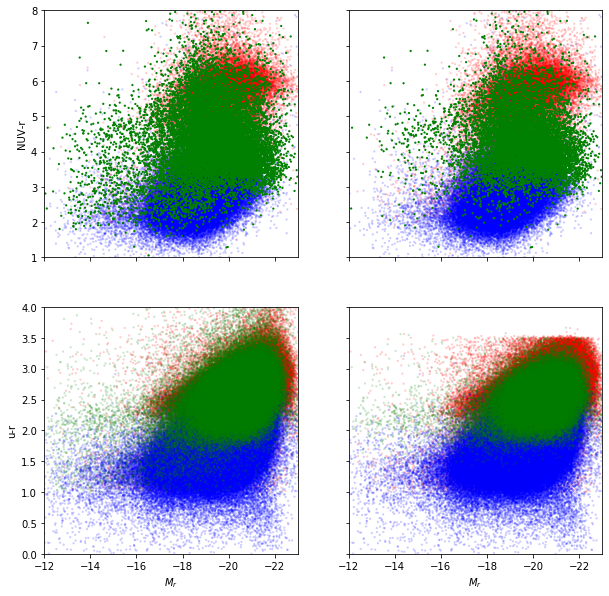

In [10]:
f, axes = plt.subplots(2, 2, sharex='all', sharey='row', figsize=(20,20))

axes[0,0].scatter(red_sequence['rabsmag_NSA'], red_sequence['NUV_r'], s=5, c='r', 
                  alpha=0.2, edgecolors='none')
axes[0,0].scatter(blue_cloud['rabsmag_NSA'], blue_cloud['NUV_r'], s=5, c='b', 
                  alpha=0.2, edgecolors='none')
axes[0,0].scatter(green_valley['rabsmag_NSA'], green_valley['NUV_r'], s=5, c='g', 
                  edgecolors='none')
axes[0,0].axis([-23, -12, 1, 8])
axes[0,0].invert_xaxis()

axes[0,1].scatter(RS['rabsmag_NSA'], RS['NUV_r'], s=5, c='r', alpha=0.2, edgecolors='none')
axes[0,1].scatter(BC['rabsmag_NSA'], BC['NUV_r'], s=5, c='b', alpha=0.2, edgecolors='none')
axes[0,1].scatter(GV['rabsmag_NSA'], GV['NUV_r'], s=5, c='g', edgecolors='none')
axes[0,1].axis([-23, -12, 1, 8])
axes[0,1].invert_xaxis()

axes[0,0].set(ylabel='NUV-r')

axes[1,0].scatter(red_sequence['rabsmag'], red_sequence['u_r'], s=5, c='r', alpha=0.2, 
                  edgecolors='none')
axes[1,0].scatter(blue_cloud['rabsmag'], blue_cloud['u_r'], s=5, c='b', alpha=0.2, 
                  edgecolors='none')
axes[1,0].scatter(green_valley['rabsmag'], green_valley['u_r'], s=5, c='g', alpha=0.2, 
                  edgecolors='none')
axes[1,0].set(xlabel='$M_r$')
axes[1,0].axis([-23, -12, 0, 4])
axes[1,0].invert_xaxis()

axes[1,1].scatter(RS['rabsmag'], RS['u_r'], s=5, c='r', alpha=0.2, edgecolors='none')
axes[1,1].scatter(BC['rabsmag'], BC['u_r'], s=5, c='b', alpha=0.2, edgecolors='none')
axes[1,1].scatter(GV['rabsmag'], GV['u_r'], s=5, c='g', alpha=0.2, edgecolors='none')
axes[1,1].set(xlabel='$M_r$')
axes[1,1].axis([-23, -12, 0, 4])
axes[1,1].invert_xaxis()

axes[1,0].set(ylabel='u-r');

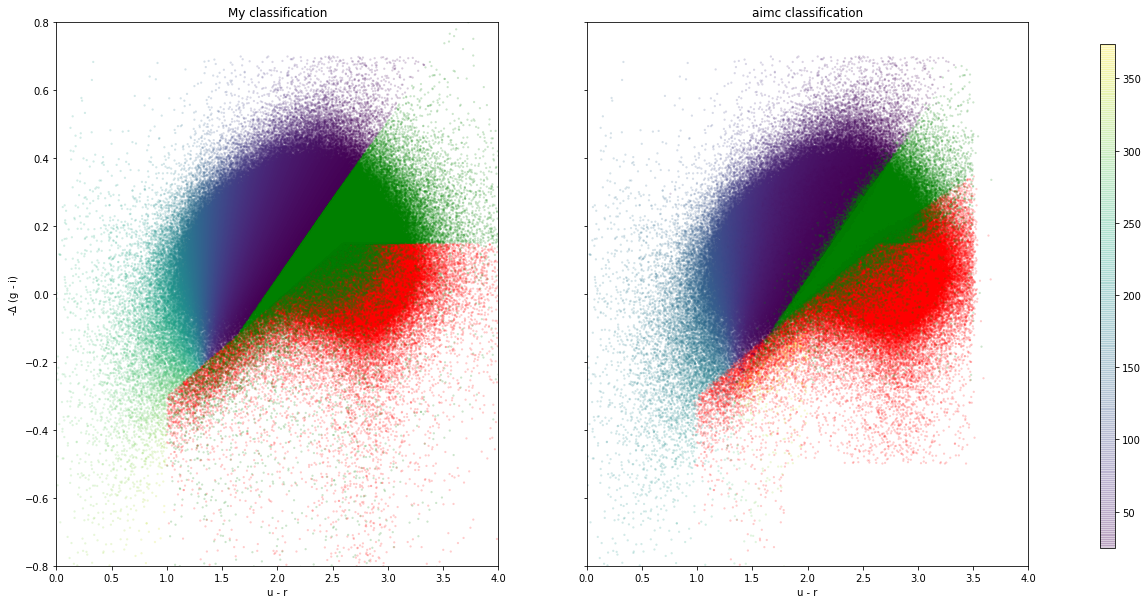

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))

ax1.scatter(red_sequence['u_r'], -red_sequence['cd'], s=5, c='r', alpha=0.2, 
            edgecolors='none')
ax1.scatter(blue_cloud['u_r'], -blue_cloud['cd'], s=5, c=blue_cloud['my_aimc'], 
            alpha=0.2, edgecolors='none')
ax1.scatter(green_valley['u_r'], -green_valley['cd'], s=5, c='g', alpha=0.2, 
            edgecolors='none')
ax1.set(xlabel='u - r')
ax1.set_title('My classification')
ax1.axis([0, 4, -0.8, 0.8])

ax2.scatter(RS['u_r'], -RS['cd'], s=5, c='r', alpha=0.2, edgecolors='none')
cim = ax2.scatter(BC['u_r'], -BC['cd'], s=5, c=BC['aimc'], alpha=0.2, edgecolors='none')
ax2.scatter(GV['u_r'], -GV['cd'], s=5, c='g', alpha=0.2, edgecolors='none')
ax2.set(xlabel='u - r')
ax2.set_title('aimc classification')
ax2.axis([0, 4, -0.8, 0.8])

f.subplots_adjust(hspace=0)
ax1.set(ylabel='-$\Delta$ (g - i)')
f.subplots_adjust(right=0.8)

cax = f.add_axes([0.85, 0.15, 0.01, 0.7])
f.colorbar(cim, cax=cax);